In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('ratings.csv', names=['userID', 'productID', 'rating', 'timestamp'])
print(data.shape)
data.head()

(7824482, 4)


,userID,productID,rating,timestamp
0,AKM1MP6P0OYPR,0132793040,5.0,1365811200
1,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
2,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
3,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
4,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200


In [3]:
data = data.iloc[:50000, 0:]
data.shape

(50000, 4)

In [4]:
data.dtypes

userID        object
productID     object
rating       float64
timestamp      int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   userID     50000 non-null  object 
 1   productID  50000 non-null  object 
 2   rating     50000 non-null  float64
 3   timestamp  50000 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


In [6]:
data.drop(['timestamp'], axis =  1, inplace =  True)

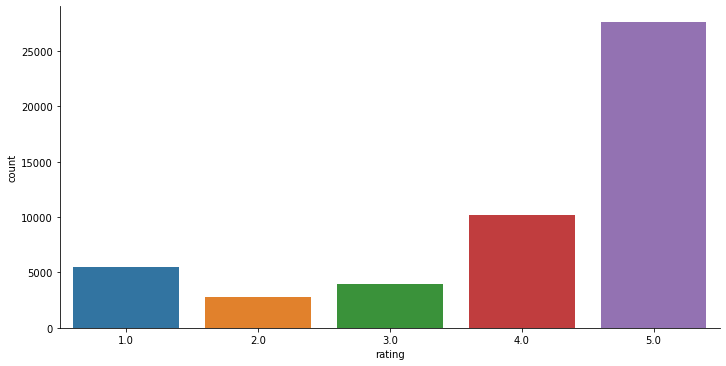

In [7]:
g= sns.catplot(x="rating",data=data,kind="count", aspect=2.0)

In [8]:
print(f'Unique users: {len(np.unique(data.userID))}\n')
print(f'Unique products: {len(np.unique(data.productID))}')

Unique users: 46554

Unique products: 3446


In [9]:
rated_prod_p_user = data.groupby(by='userID')['rating'].count()
# print(rated_prod_p_user.head)
rated_prod_p_user.describe()


count    46554.000000
mean         1.074022
std          0.520846
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         37.000000
Name: rating, dtype: float64

In [10]:
rated_prod_p_user = rated_prod_p_user.sort_values(ascending=False)
rated_prod_p_user.head(10)

userID
A231WM2Z2JL0U3    37
AY8Q1X7G96HV5     31
ALUNVOQRXOZIA     20
A1NVD0TKNS1GT5    19
A243HY69GIAHFI    18
A1RPTVW5VEOSI     17
A1ISUNUWG0K02V    16
A1MJMYLRTZ76ZX    16
A7Y6AVS576M03     15
A3MEIR72XKQY88    15
Name: rating, dtype: int64

## Popularity Based Recommender System

### Getting the items with the most reviews

In [11]:
popular =  data.groupby('productID').filter(lambda x:x['rating'].count()>50)
print(popular.shape)
popular.head(10)

(30758, 3)


,userID,productID,rating
183,A1BKC6B7YHYTVV,0972683275,4.0
184,AWVFSIB42LHKJ,0972683275,4.0
185,A36MQBNADRH8YY,0972683275,5.0
186,A3SRXMPLAEZ6DP,0972683275,4.0
187,A20XXTXWF2TCPY,0972683275,5.0
188,AOZZ0CTG5RMW1,0972683275,4.0
189,A2IDCSC6NVONIZ,0972683275,5.0
190,AML8NIWFKHZJU,0972683275,3.0
191,A33HBPL7Q6SZMG,0972683275,5.0
192,A22JDDJB1ZLGGZ,0972683275,5.0


In [12]:
popular.describe()

,rating
count,30758.000000
mean,4.130275
std,1.291313
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [13]:
ratings_per_item = popular.groupby(by= 'productID')['rating'].count().sort_values(ascending = False)
ratings_per_item.head(10)

productID
B00001P4ZH    2075
B00004T8R2    1692
B00001WRSJ    1586
0972683275    1051
B00004SABB    1030
B00004SB92    1006
B00004THCZ     820
B00001P4XA     579
1400532655     484
B00000K2YR     457
Name: rating, dtype: int64

### Getting the average rating per item

In [14]:
avg_rating =pd.DataFrame(popular.groupby(by='productID')['rating'].mean())
avg_rating.head(10)

,rating
productID,
0972683275,4.470980
1400501466,3.560000
1400501520,4.243902
1400501776,3.884892
1400532620,3.684211
1400532655,3.727273
140053271X,3.900232
1400532736,3.904762
1400599997,3.490991


In [15]:
## adding a new column for the new df
avg_rating['reviews'] = pd.DataFrame(popular.groupby('productID')['rating'].count())
# avg_rating.head(10)
avg_rating.describe()

,rating,reviews
count,165.000000,165.000000
mean,4.018133,186.412121
std,0.497813,276.107305
min,2.048387,51.000000
25%,3.781818,66.000000
50%,4.092308,96.000000
75%,4.400000,179.000000
max,4.840517,2075.000000


###### Remove items with average rating below 3.5 and recommend the item with most reviews


In [16]:
avg_rating['reviews'] = pd.DataFrame(popular.groupby('productID')['rating'].count())
avg_rating= avg_rating[avg_rating['rating']>=3.5].sort_values(by='reviews',ascending = False)
avg_rating.head(10)

,rating,reviews
productID,,
B00001P4ZH,4.456386,2075
B00004T8R2,4.280142,1692
B00001WRSJ,4.609079,1586
0972683275,4.470980,1051
B00004SABB,4.011650,1030
B00004SB92,3.918489,1006
B00004THCZ,4.232927,820
B00001P4XA,3.832470,579
1400532655,3.727273,484


## Memory Based Collaborative Filtering

In [17]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

from surprise import KNNWithMeans

from surprise import KNNBasic
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
from surprise.model_selection import train_test_split

In [18]:
#The Reader class is used to parse a file containing ratings.
reader = Reader(rating_scale=(1, 5))
new_data = Dataset.load_from_df(popular,reader)
new_data

In [19]:
train, test = train_test_split(new_data, test_size = 0.25, random_state=10)
print(train)

In [20]:
popular.shape

(30758, 3)

In [21]:
##A basic collaborative filtering algorithm, taking into account the mean ratings of each user.
knn  = KNNWithMeans(k=7 , sim_options={'name': 'pearson_baseline', 'user-based' : False})
knn.fit(train)
prediction = knn.test(test)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [22]:
accuracy.rmse(prediction, verbose=True)

RMSE: 1.2781


1.2781072484074663

## Model Based Colaborative Filtering

In [23]:
mbdf = popular.head(10000)

In [24]:
rating_df = mbdf.pivot_table(values = 'rating', index ='userID', columns='productID', fill_value=0)
print(rating_df.shape)
rating_df.head(10)

(9832, 74)


productID,0972683275,1400501466,1400501520,1400501776,1400532620,1400532655,140053271X,1400532736,1400599997,1400698987,...,B00000JFIF,B00000JFMK,B00000JHWX,B00000JI4F,B00000JII6,B00000JMUG,B00000JSGF,B00000JYLO,B00000JYWQ,B00000K135
userID,,,,,,,,,,,,,,,,,,,,,
A01852072Z7B68UHLI5UG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0266076X6KPZ6CCHGVS,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0293130VTX2ZXA70JQS,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A030530627MK66BD8V4LN,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0571176384K8RBNKGF8O,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0590501PZ7HOWJKBGQ4,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
A0641581307AKT5MAOU0Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A076219533YHEV2LJO988,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A0821988FXKFYX53V4QG,0,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
transpose = rating_df.T
print(transpose.shape)
transpose.head(10)

(74, 9832)


userID,A01852072Z7B68UHLI5UG,A0266076X6KPZ6CCHGVS,A0293130VTX2ZXA70JQS,A030530627MK66BD8V4LN,A0571176384K8RBNKGF8O,A0590501PZ7HOWJKBGQ4,A0641581307AKT5MAOU0Q,A076219533YHEV2LJO988,A0821988FXKFYX53V4QG,A099626739FNCRNHIKBCG,...,AZV9WA9MNT0FB,AZWOPBY75SGAM,AZX0ZDVAFMN78,AZX5LAN9JEAFF,AZX7I110AF0W2,AZXKUK895VGSM,AZXP46IB63PU8,AZYTSU42BZ7TP,AZZGJ2KMWB7R,AZZMV5VT9W7Y8
productID,,,,,,,,,,,,,,,,,,,,,
0972683275,0,0,5,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501466,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400501520,0,0,0,0,0,0,0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
1400501776,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1400532620,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400532655,0,0,0,0,0,0,0,0,0,0,...,5,0,0,0,0,0,0,3,0,0
140053271X,0,0,0,0,0,0,0,3,5,0,...,0,0,0,0,0,0,0,0,0,0
1400532736,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1400599997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=15)
decomposed_matrix = SVD.fit_transform(transpose)
print(decomposed_matrix.shape)
decomposed_matrix

(74, 15)


array([[ 1.48104508e+02, -1.54607063e-01,  2.45225004e-02, ...,
         2.91794994e-05, -9.12047278e-04, -3.55592157e-04],
       [ 6.76535091e-04,  1.28375336e+00,  1.47878130e+00, ...,
        -3.03930959e+00,  2.12801325e-02, -9.02598973e-02],
       [ 2.77835467e-05,  9.46526543e-02,  3.06044929e-01, ...,
         1.12561614e+00, -9.75202230e-02,  6.53409694e-01],
       ...,
       [ 1.78200987e-04,  1.36329485e-03,  7.79458782e-05, ...,
         4.29926933e-01,  5.22223675e-01, -2.71084367e-01],
       [ 2.67598849e-06,  1.49226656e-03, -2.38352508e-03, ...,
        -7.18437060e-02,  5.44745069e-01, -3.56867106e-01],
       [-3.68083019e-06, -8.19699921e-04,  3.35369033e-03, ...,
        -1.26358692e+00, -7.57391722e-02,  7.06361662e-01]])

In [27]:
cor_matrix = np.corrcoef(decomposed_matrix)
# cor_matrix.shape
# cor_matrix

In [28]:
itemIDs = list(transpose.index)

In [29]:
variable = np.random.randint(transpose.shape[0])
specific_product =  itemIDs[variable]
print(f'itemID: {specific_product}, index : {variable}')

itemID: 9984984354, index : 20


In [30]:
correlation_product_ID = cor_matrix[variable]
correlation_product_ID

array([-0.11670591, -0.05515603,  0.28049702,  0.02100445,  0.09210174,
       -0.09669037, -0.13854985, -0.4164147 , -0.06307775, -0.56064127,
        0.45841443, -0.07409461, -0.07438862,  0.59187572,  0.16921277,
        0.02583569,  0.8090844 ,  0.02450844, -0.15145601,  0.25189029,
        1.        ,  0.85141602, -0.11880554, -0.47469693, -0.05752312,
        0.79078339, -0.11694416, -0.85732237, -0.4658439 , -0.10964997,
        0.58880617,  0.08038987, -0.21486552, -0.21709008,  0.79833418,
        0.5065188 ,  0.7690747 , -0.05575844, -0.24848835,  0.1726623 ,
        0.09199666, -0.93197799,  0.11245809,  0.72450991,  0.00724787,
       -0.05572763, -0.32993621,  0.26340911, -0.28928377, -0.7244786 ,
        0.91824059, -0.79310761, -0.4487838 ,  0.67402462,  0.29871922,
       -0.19636653, -0.16831165, -0.48570879, -0.94592108,  0.05613527,
       -0.18008088, -0.28312329, -0.49870557,  0.77233707, -0.29153332,
       -0.02044396,  0.46154556, -0.12239952, -0.01435983,  0.51

In [31]:
threshold = float(input('Set your threshold: (value between 0 and 1)\n'))

Set your threshold: (value between 0 and 1)
0.5


In [32]:
recommendation =  list(transpose.index[correlation_product_ID > threshold])
recommendation.remove(specific_product)
recommendation

['8862935293',
 '9625993428',
 '9985511476',
 'B000001ON6',
 'B00000J08Q',
 'B00000J1EP',
 'B00000J1EQ',
 'B00000J1F3',
 'B00000J1UQ',
 'B00000J4EY',
 'B00000J6WY',
 'B00000JFE3',
 'B00000JMUG']